## PART A

#### DOMAIN: 
Automobile

#### CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.

#### DATA DESCRIPTION: 

<style>
  table {
    margin: auto;
    width: 100%; /* Adjust the width as needed */
    border: 1px solid black;
    border-collapse: collapse;
  }
  tr {
    text-align: center;
    padding: 8px; /* Adding padding for better readability */
    border: 1px solid black;
    border-collapse: collapse;
  }
  td {
    text-align: center;
    padding: 8px; /* Adding padding for better readability */
    border: 1px solid black;
    border-collapse: collapse;
  }
  th
  {
    border: 1px solid black;
    border-collapse: collapse;
    text-align: center;
  }
</style>

<table>
    <tr>
        <td><b>cylinders:</b> multi-valued discrete</td>
        <td><b>acceleration:</b> continuous</td>
    </tr>
    <tr>
        <td><b>displacement:</b> continuous</td>
        <td><b>model year:</b> multi-valued discrete</td>
    </tr>
    <tr>
        <td><b>horsepower:</b> continuous</td>
        <td><b>origin:</b> multi-valued discrete</td>
    </tr>
    <tr>
        <td><b>weight:</b> continuous</td>
        <td><b>car name:</b> string (unique for each instance)</td>
    </tr>
    <tr>
        <td><b>mpg:</b> continuous</td>
        <td></td>
    </tr>    
</table>

#### PROJECT OBJECTIVE: 
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [1]:
#Importing required packages
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

### STEPS AND TASK [30 Marks]:

#### 1. Data Understanding & Exploration: [5 Marks]

#### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
df_car_name = pd.read_csv('Car name.csv')

In [3]:
df_car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df_car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5]:
print('There are', df_car_name.shape[0],'rows and', df_car_name.shape[1], 'columns in df_car_name Dataframe.')

There are 398 rows and 1 columns in df_car_name Dataframe.


#### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [6]:
df_car_attributes = pd.read_json('Car-Attributes.json')

In [7]:
df_car_attributes.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df_car_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
print('There are', df_car_attributes.shape[0],'rows and', df_car_attributes.shape[1], 'columns in df_car_attributes Dataframe.')

There are 398 rows and 8 columns in df_car_attributes Dataframe.


#### C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [10]:
df_car = pd.merge(df_car_name, df_car_attributes, how='outer', left_index=True, right_index=True)

In [11]:
df_car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
print('There are', df_car.shape[0],'rows and', df_car.shape[1], 'columns in df_car Dataframe.')

There are 398 rows and 9 columns in df_car Dataframe.


#### D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [14]:
df_car.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


- There are 398 rows in each column of the dataset
- Average miles per gallon of all cars is 23.5mpg and minimum is 9mpg and maximum is 46.6mpg. Median miles per gallon is 23.
- Minimum number of cylinders in all cars is 3 and maximum is 8. Median number of cylinders is 4.
- Average engine displacement of all cars is 193 and minimum is 68 and maximum is 455. Median engine displacement is 148.5.
- Average weight of all cars is 2970.4 and minimum is 1613 and maximum is 5140. Median weight is 2803.5.
- Average acceleration of all cars is 15.57 and minimum is 8 and maximum is 24.8. Median acceleration is 15.5.
- Average year of all cars is 76 and minimum is 70 and maximum is 82. Median year is 76.
- Minimum origin of all cars is 1 and maximum is 3. Median acceleration is 1.

#### 2. Data Preparation & Analysis: [10 Marks]

#### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

In [15]:
df_car.isnull().mean().round(4).mul(100).sort_values(ascending=False)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

##### None of the columns have missing values, so there is no need to impute any missing values.

In [16]:
# Let's check the blank values in the merged DataFrame i.e. df_car
df_car.eq(' ').mean().round(4).mul(100).sort_values(ascending=False)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

##### None of the columns have blank values, so there is no need to impute any blank values.

#### B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [17]:
df_car.duplicated().sum()

0

##### There are no duplicate rows in the dataset

#### C. Plot a pairplot for all features. [1 Marks]

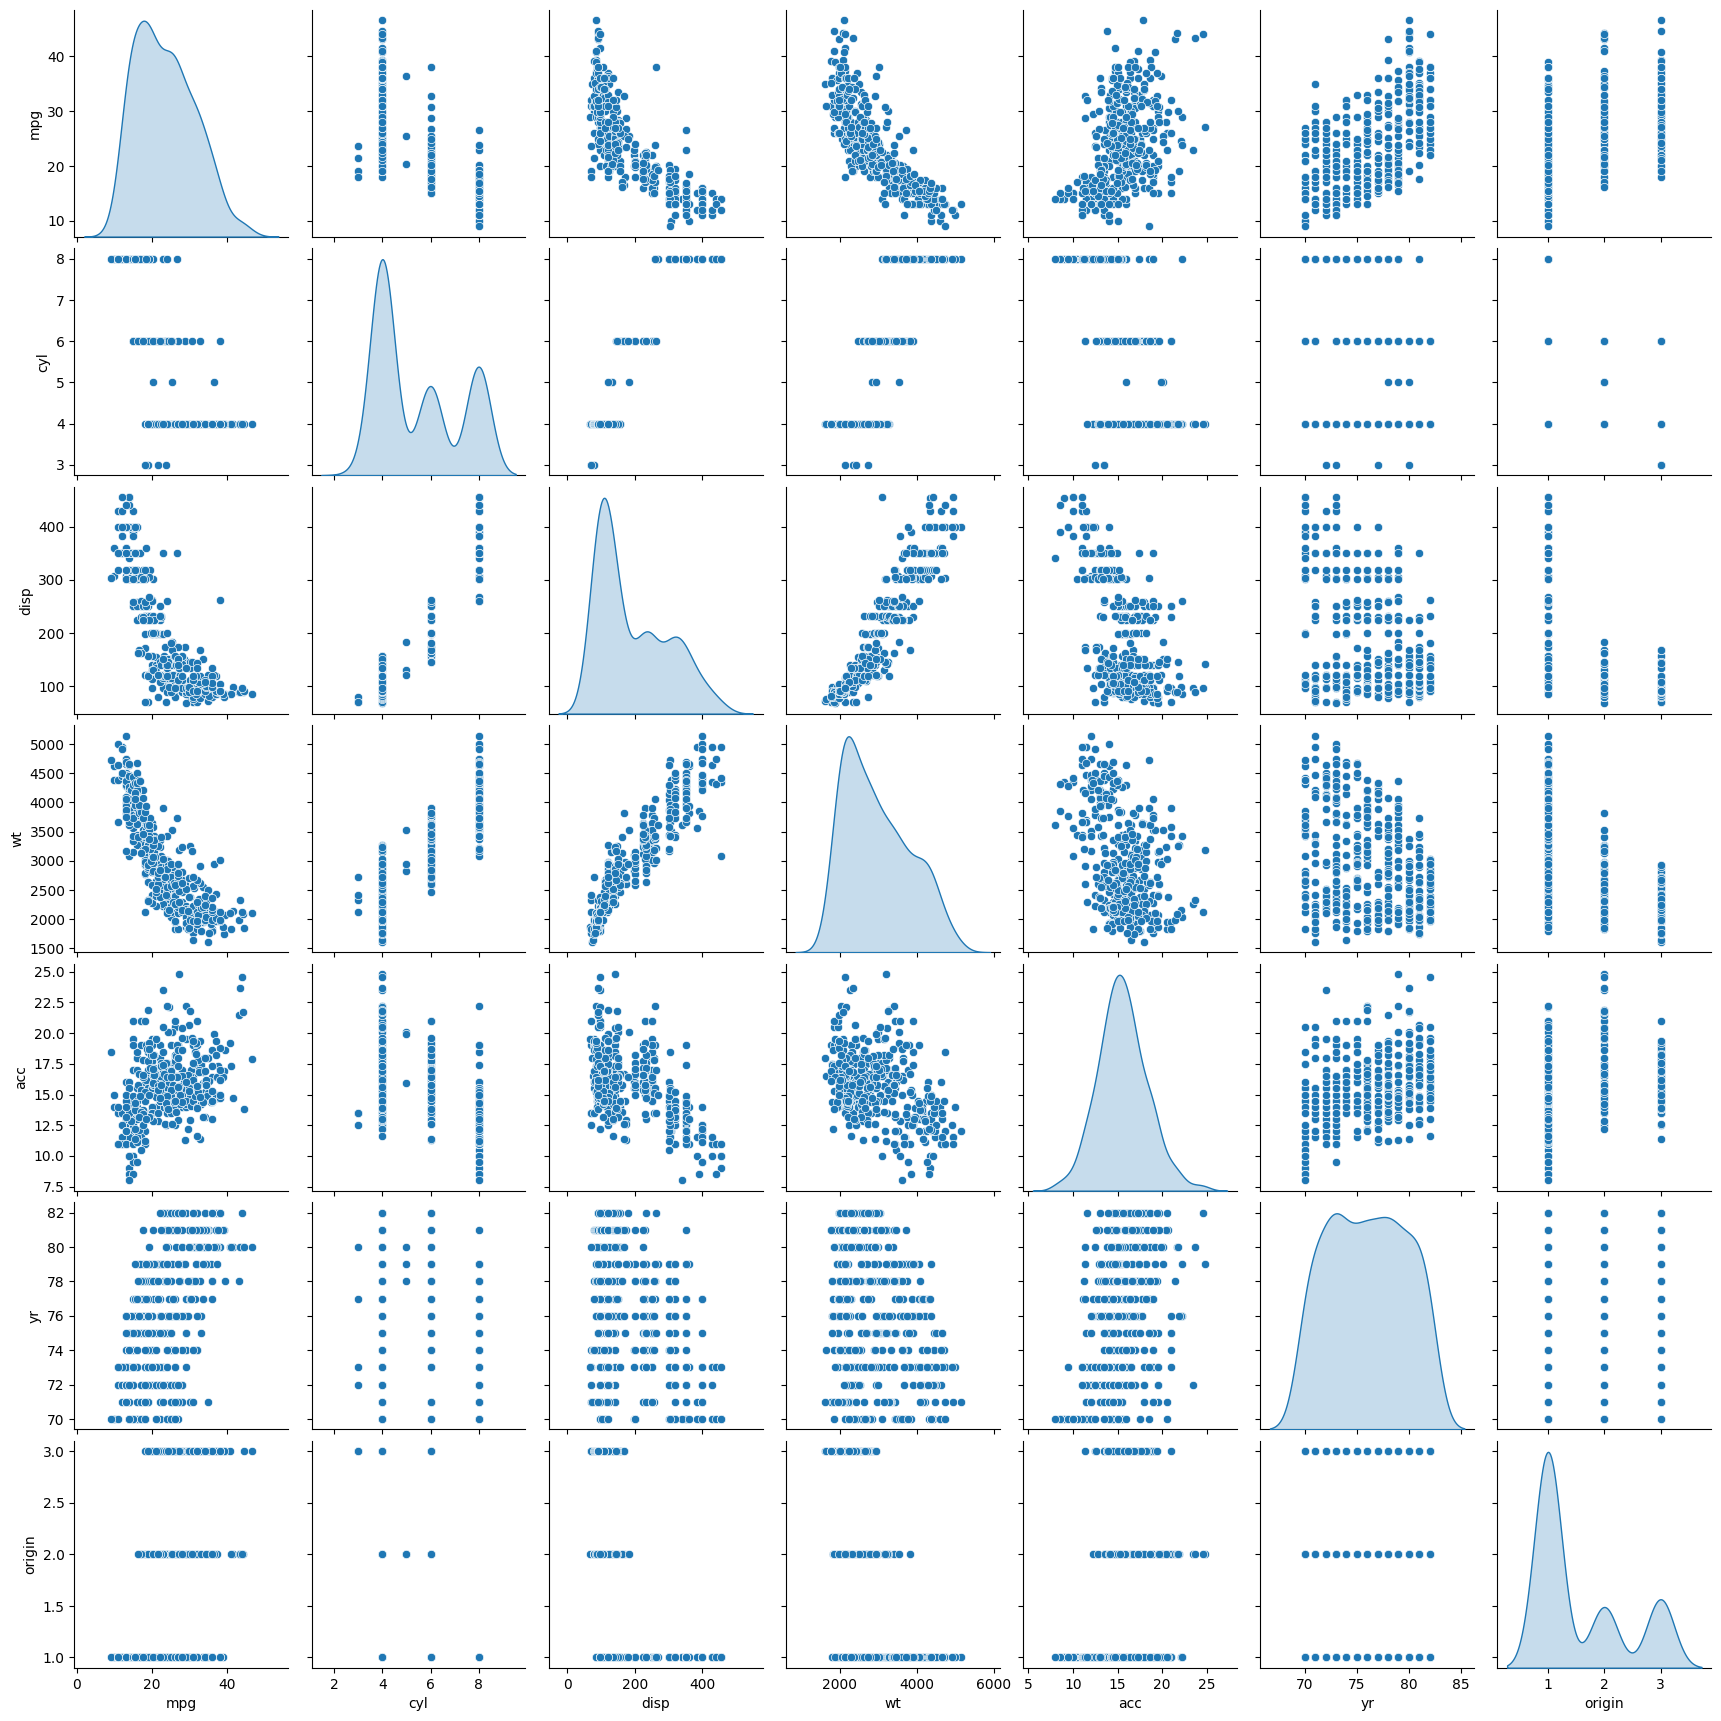

In [18]:
sns.pairplot(df_car, diag_kind='kde');   # to plot density curve instead of histogram on the diag

#### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

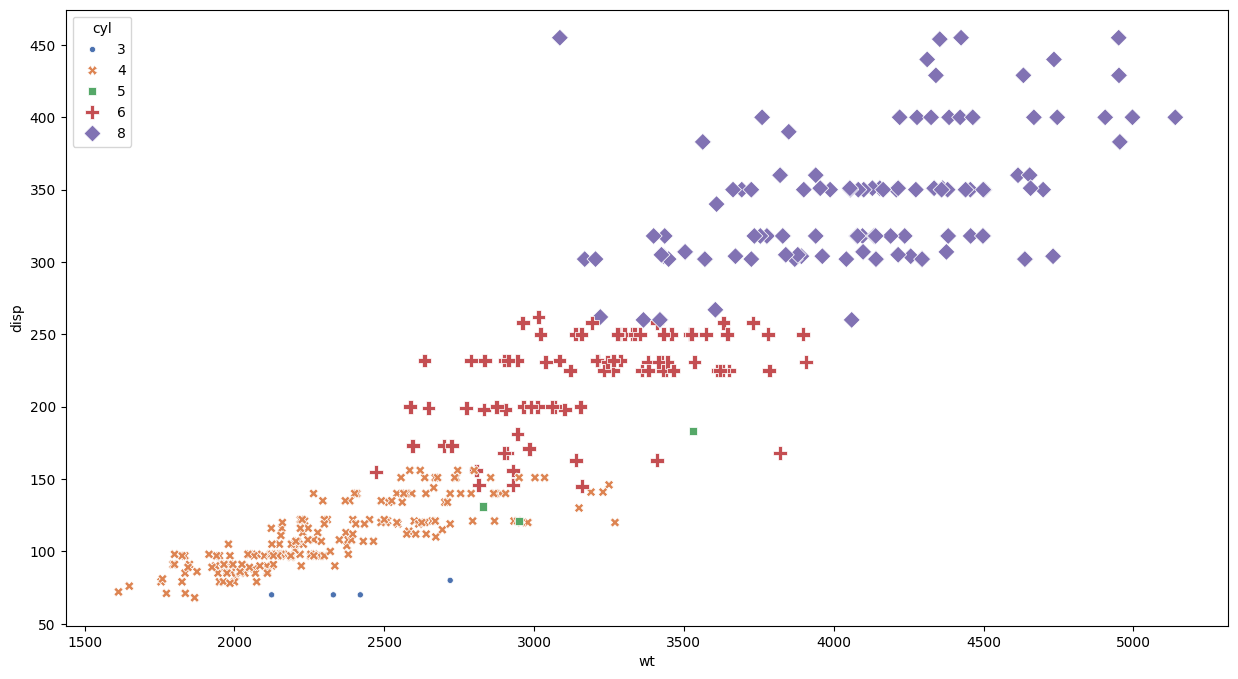

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='disp', hue='cyl', palette='deep', style='cyl', size='cyl', sizes=(20, 150));

#### E. Share insights for Q2.d. [1 Marks]

- wt and disp are positively correlated.
- There are few data points when cyl is 3 and 5.
- As the wt and disp increases, number of cyl also increases.
- We can see 3 clear clusters getting formed on weight, displacement and number of cylinders
- Lower weights (1500 to 3000), Lower displacements (50 to 150) and Lower number of cylinders (3,4,5) forming one cluster
- Medium weights (2500 to 4000), Medium displacements (150 to 250) and Medium number of cylinders (5,6) forming one cluster
- Higher weights (3500 to 5000), Higher displacements (300 to 450) and Higher number of cylinders (8) forming one cluster

#### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

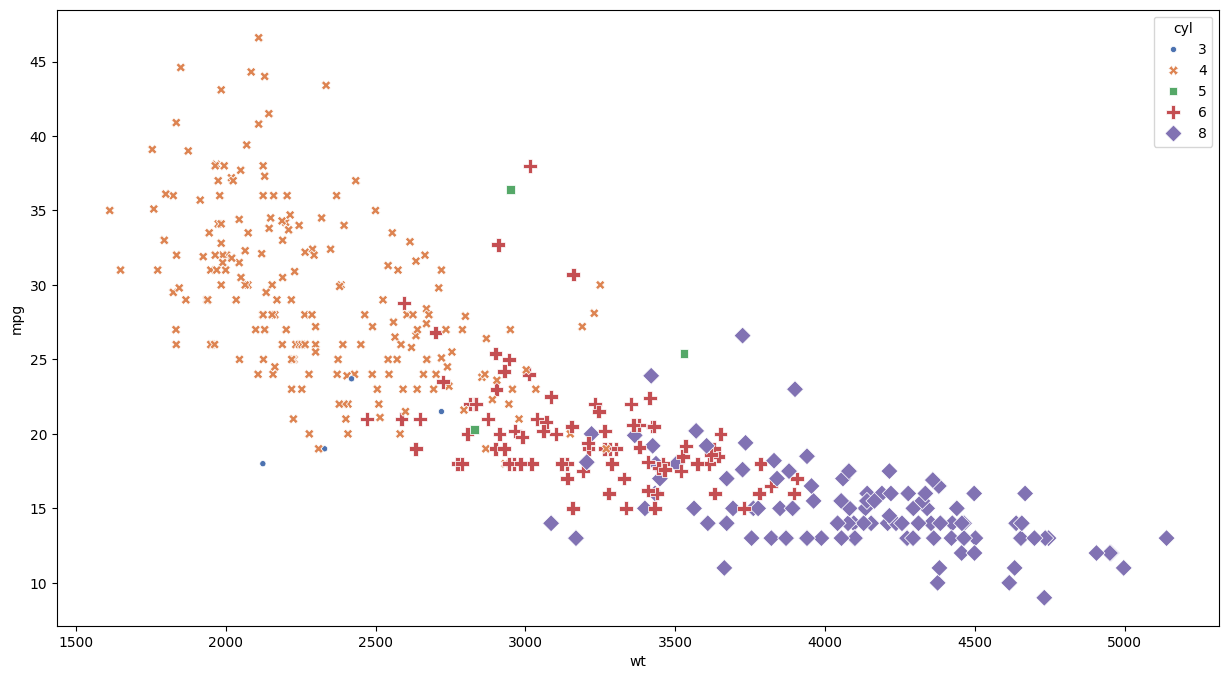

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='mpg', hue='cyl', palette='deep', style='cyl', size='cyl', sizes=(20, 150));

#### G. Share insights for Q2.f. [1 Marks]

- wt and mpg are negatively correlated.
- There are few data points when cyl is 3 and 5.
- Here also, we can see 3 clear clusters getting formed on weight, miles per gallon and number of cylinders
- Lower weights (1500 to 3000), Higher mile per gallon (20 to 45) and Lower number of cylinders (3,4,5) forming one cluster
- Medium weights (2500 to 4000), Medium miles per gallon (15 to 20) and Medium number of cylinders (5,6) forming one cluster
- Higher weights (3500 to 5000), Lower miles per gallon (5 to 15) and Higher number of cylinders (8) forming one cluster

#### H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

##### horsepower is numerical value and stored as object. Let's check the values which are non-numerical and convert it to float

In [21]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df_car.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df_car[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


##### There are unexpected values present in hp column. '?' is unexpected value. Let's replace with NaN

In [22]:
pd.set_option('future.no_silent_downcasting', True)
df_car = df_car.replace('?', np.nan)
df_car[hpIsDigit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


##### Convert 'hp' column to float

In [23]:
df_car['hp'] = df_car['hp'].astype('float64')  # converting the hp column from object / string type to float

In [24]:
no_of_rows_before_cleanup = df_car.shape[0]

##### Drop all the rows which have NaN values in atleast one column

In [25]:
df_car.dropna(inplace=True)

In [26]:
no_of_rows_after_cleanup = df_car.shape[0]

In [27]:
print("Deleted number of rows = ", no_of_rows_before_cleanup - no_of_rows_after_cleanup)

Deleted number of rows =  6


#### 3. Clustering: [15 Marks]

#### A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

##### Since K-Means is distance based algorithm, it is important to scale the data before applying K-Means clustering 

In [28]:
# Dropping/ignoring car_name and origin for the kmeans clustering as they are categorical variables
df_car_clean = df_car.drop(['car_name','origin'], axis=1)

scaler = StandardScaler()
df_car_scaled = pd.DataFrame(scaler.fit_transform(df_car_clean), columns = df_car_clean.columns)

#df_car_scaled=df_car_clean.apply(zscore)

In [29]:
df_car_scaled

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315
...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410


##### Now apply K-Means clustering with k ranging from 2 to 10

In [30]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_car_scaled)
    prediction=model.predict(df_car_scaled)
    meanDistortions.append(sum(np.min(cdist(df_car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_car_scaled.shape[0])

#### B. Plot a visual and find elbow point. [2 Marks]

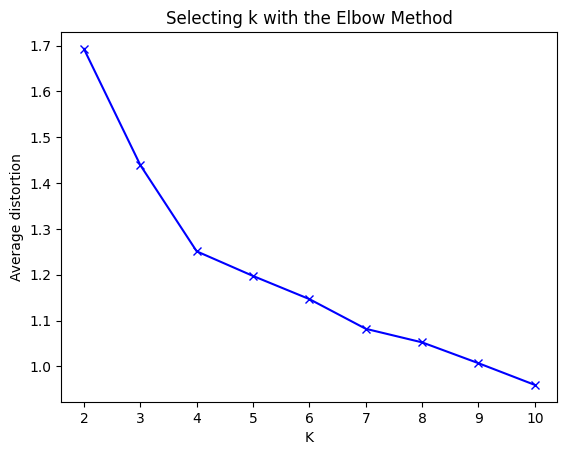

In [31]:
plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('K');
plt.ylabel('Average distortion');
plt.title('Selecting k with the Elbow Method');

#### C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

##### From the above visual, it looks like elbow is forming at K=4

#### D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [32]:
kmeans_final_model=KMeans(4)
kmeans_final_model.fit(df_car_scaled)
prediction=kmeans_final_model.predict(df_car_scaled)

#### E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [33]:
#Append the prediction 
df_car["cluster"] = prediction
df_car_scaled["cluster"] = prediction
print("Clusters Assigned : \n")
df_car.head(10)

Clusters Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,2
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,2
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,2
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,2
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,2


In [34]:
carClust = df_car.groupby(['cluster'])
carClust.mean(numeric_only=True)

,mpg,cyl,disp,hp,wt,acc,yr,origin
cluster,,,,,,,,
0,19.589773,6.181818,226.602273,103.068182,3276.250000,16.412500,76.261364,1.170455
1,32.843636,4.054545,111.272727,75.072727,2306.763636,16.649091,80.036364,2.009091
2,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
3,24.977000,4.030000,111.245000,83.590000,2343.090000,16.343000,73.630000,2.000000


#### Observations
- Clusters are well differentiated in different features
- Average value of mpg is different for each cluster :
  - Cluster 0 : 19.6
  - Cluster 1 : 32.8
  - Cluster 2 : 14.4
  - Cluster 3 : 25
- Average value of number of cylinders is common for Cluster 1 and Cluster 3 which is 4. Cluster 2 has 8 cylinders and Cluster 1 has 6 cylinders
- Average value of displacement is common for Cluster 1 and 3 which is around 111. Cluster 2 has displacement 350 and Cluster 0 has displacement 226
- Average value of hp is different for each cluster :
  - Cluster 0 : 103
  - Cluster 1 : 75
  - Cluster 2 : 162
  - Cluster 3 : 83
- Average value of weight is similar for Cluster 1 and Cluster 3 which is 2306 and 2343. Cluster 2 has weight of 4158 and Cluster 0 has weight of 3276
- Average value of acceleration is similar for Cluster 0, Cluster 1 and Cluster 3 which is 16.5. Cluster 2 has acceleration of 12.57.
- Average value of year for Cluster 3 and Cluster 2 are 73 and for Cluster 1 is 80 and Cluster 0 is 76
- Average value of origin for Cluster 1 and Cluster 3 are 2 and for Cluster 0 and Cluster 2 it is 1

#### Overall, there is good differentiation between the identified clusters by the model

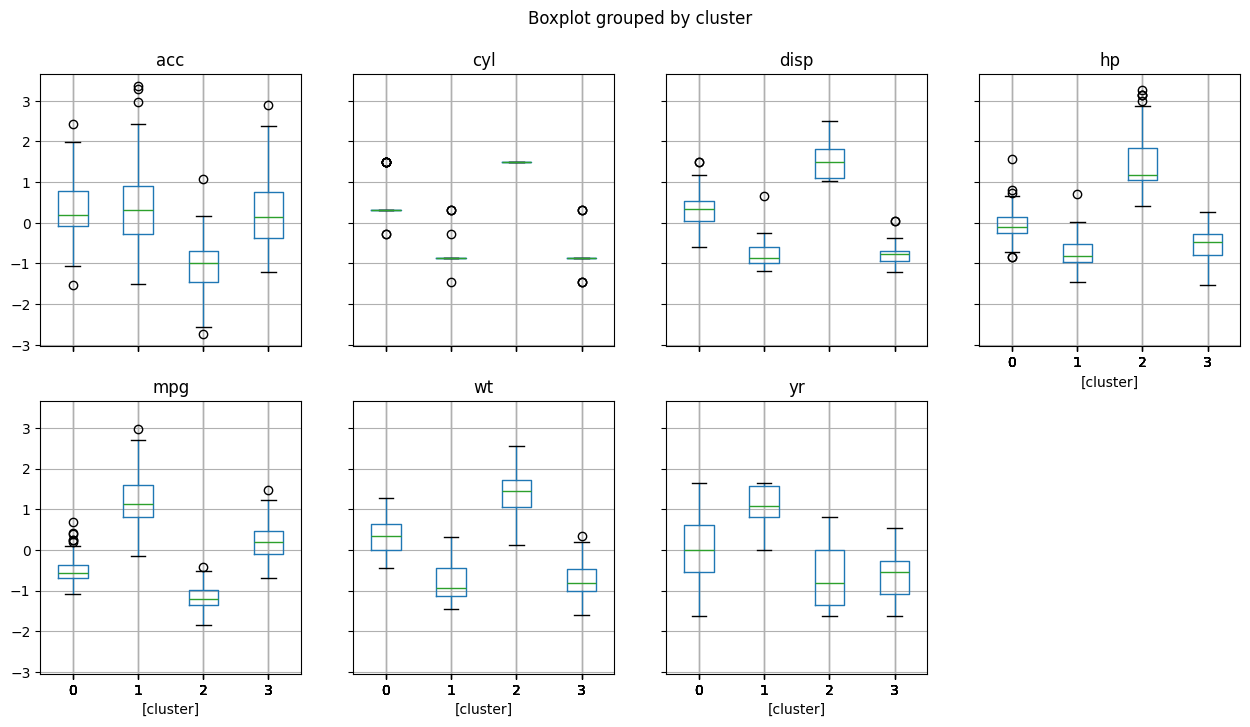

In [35]:
df_car_scaled.boxplot(by='cluster', layout = (2,4),figsize=(15,8));

#### Observations
- As observed, boxplots also show variations among different clusters. mpg, horsepower, weight, displacement, year show different percentile values of min, max, 25%, 75% and median (5 point summary)


#### This also proves that kmeans model fit the data well and clusters are well identified

#### F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

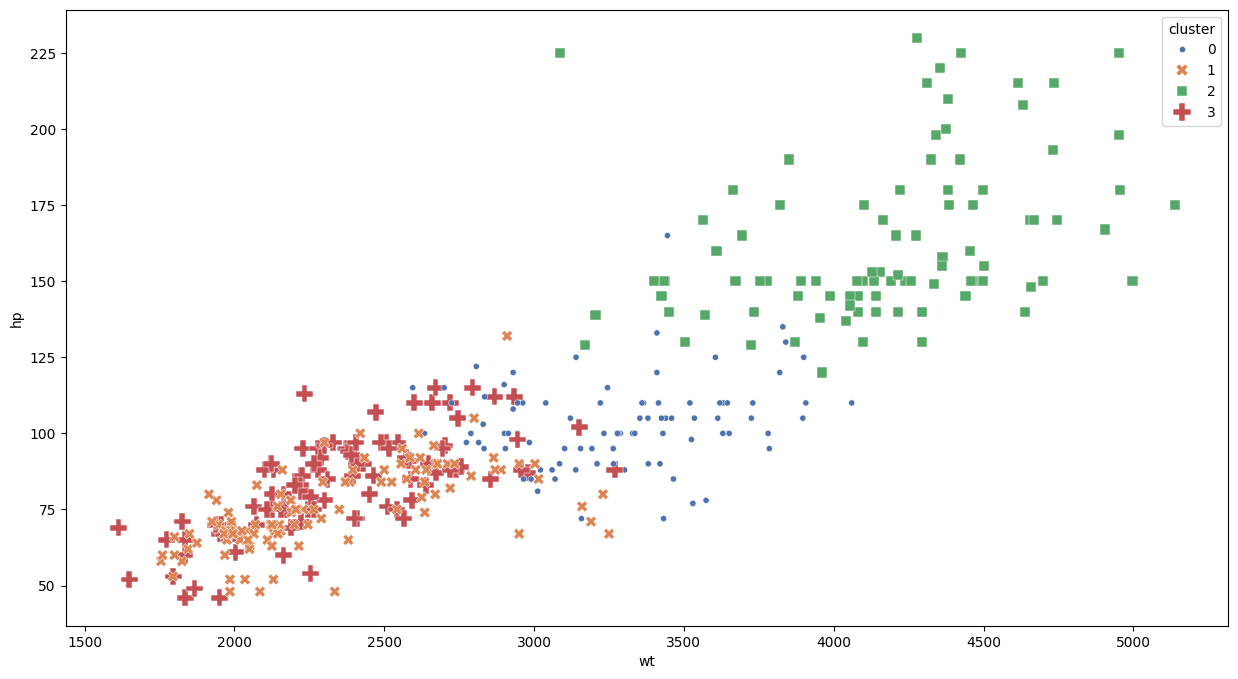

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='hp', hue='cluster', palette='deep', style='cluster', size='cluster', sizes=(20, 150));

# In the above plot, Clusters 0, 1 and 2 are well separated. However, there is some overlap observed between Clusters 1 and 3

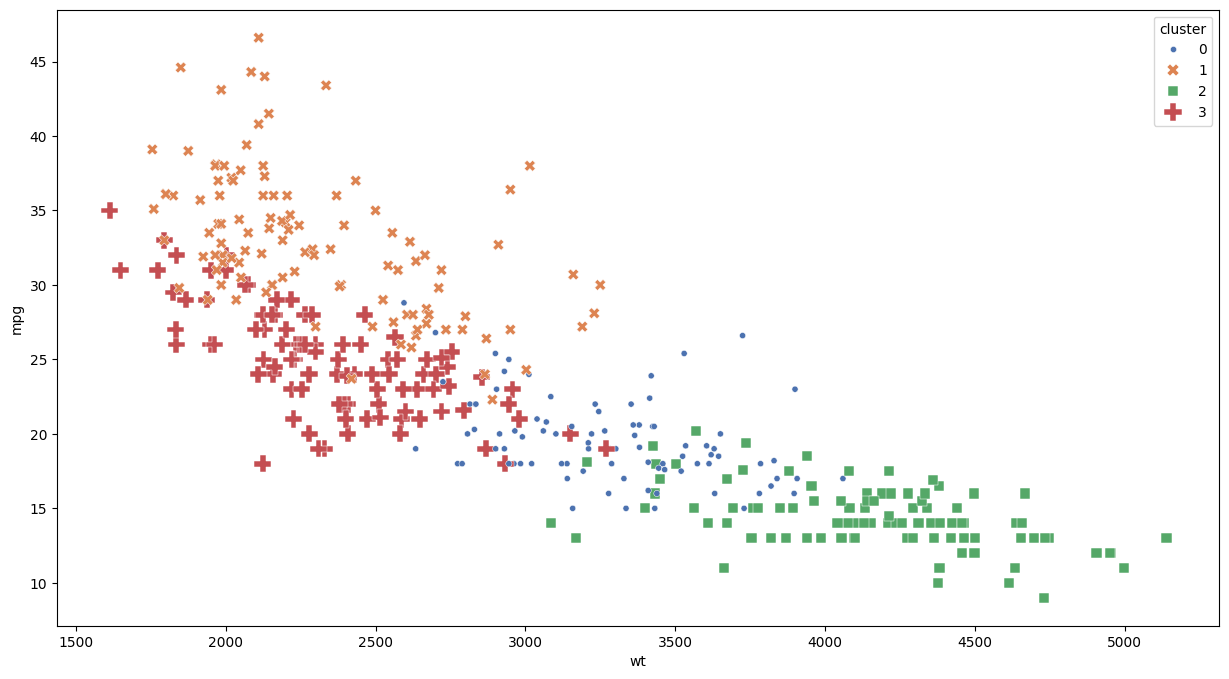

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='mpg', hue='cluster', palette='deep', style='cluster', size='cluster', sizes=(20, 150));

##### In the above plot, Clusters 0, 1, 2 and 3 are well separated.

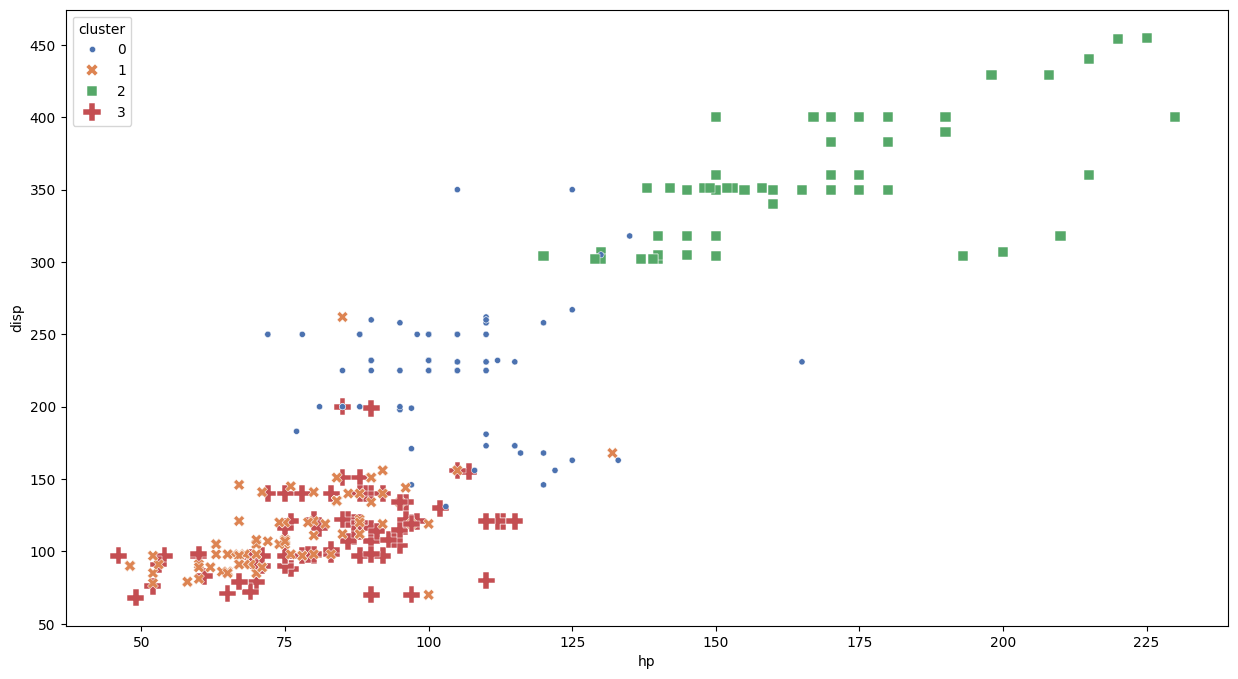

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='hp', y='disp', hue='cluster', palette='deep', style='cluster', size='cluster', sizes=(20, 150));

##### In the above plot, Clusters 0, 1 and 2 are well separated. However, there is some overlap observed between Clusters 1 and 3

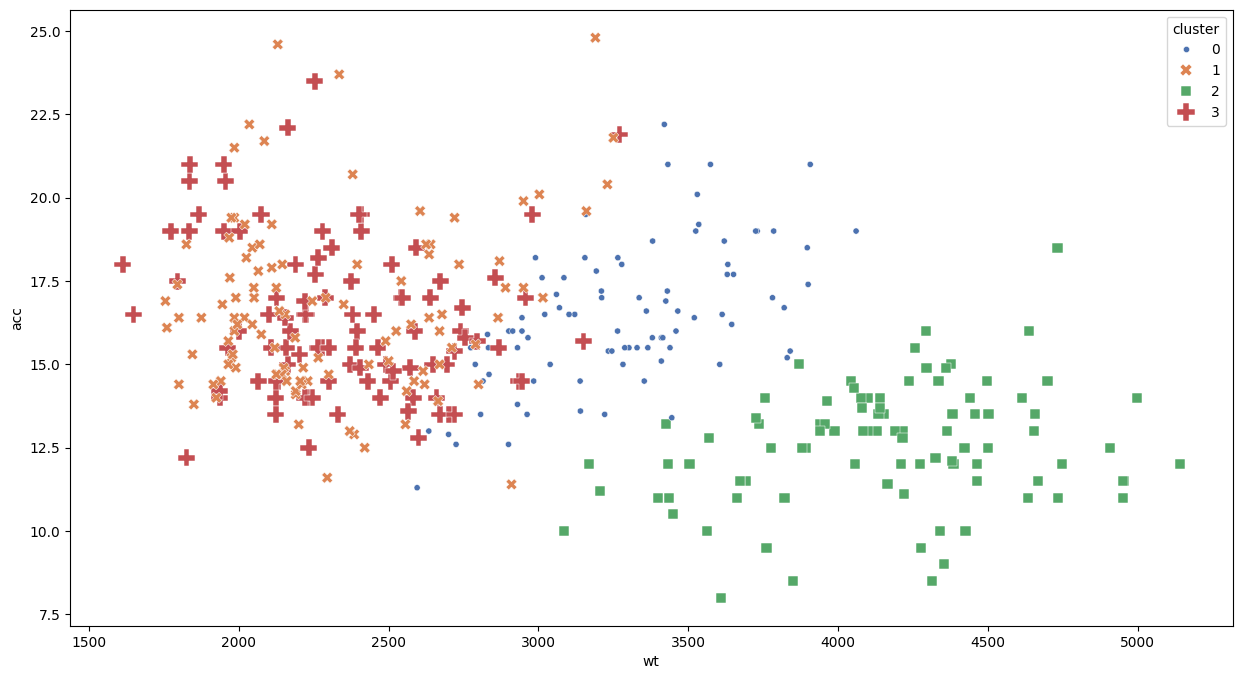

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='acc', hue='cluster', palette='deep', style='cluster', size='cluster', sizes=(20, 150));

- In the above diagram also, we can see clear separation of the clusters

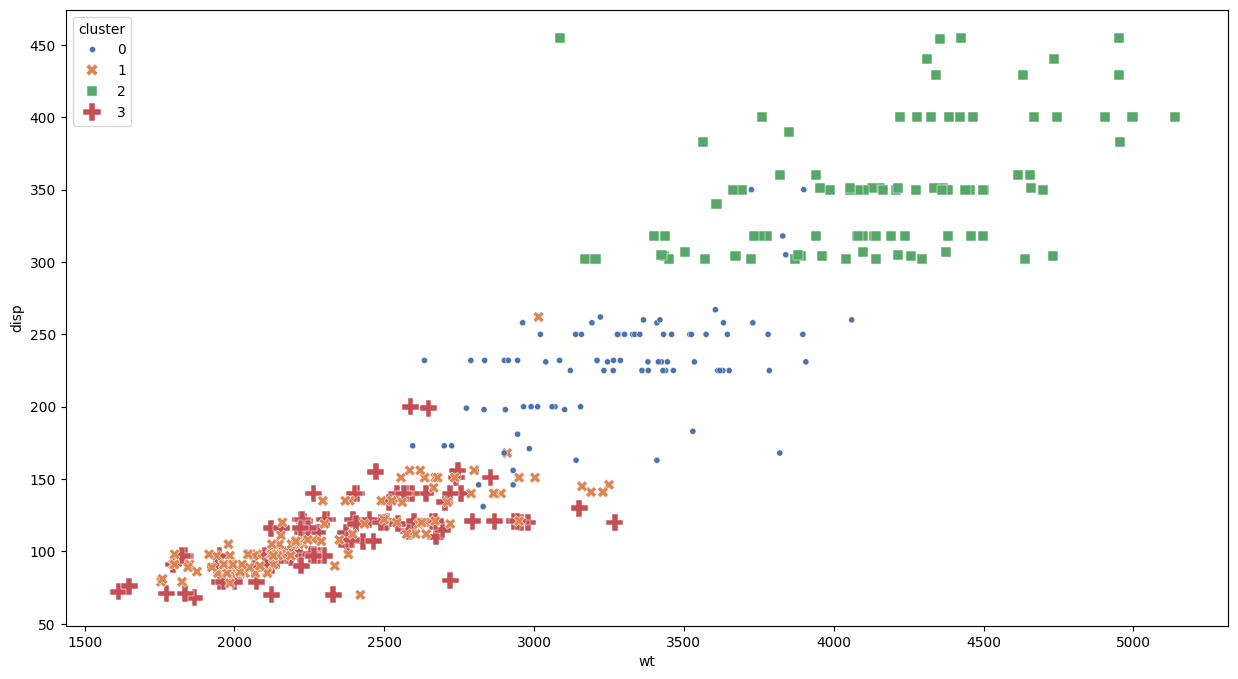

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_car, x='wt', y='disp', hue='cluster', palette='deep', style='cluster', size='cluster', sizes=(20, 150));

- Here also, we can see clear separation of the clusters, though there is some overlap between clusters 1 and 3

#### 3. G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [97]:
# Initialize data to lists
# Maruti Dzire should belong to Cluster 2 
# Hyundai Verna should belong to Cluster 0

test_data = [{'car_name':'Maruti Dzire', 'mpg':15.0, 'cyl': 8, 'disp': 365, 'hp': 155, 'wt': 4000, 'acc': 12.0, 'yr': 74, 'origin': 1},
        {'car_name':'Hyundai Verna', 'mpg':20.0, 'cyl': 6, 'disp': 235.0, 'hp': 100, 'wt': 3250, 'acc': 15.0, 'yr': 76, 'origin': 1}]
 
# Creates DataFrame.
df_car_test = pd.DataFrame(test_data)
df_car_test.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,Maruti Dzire,15.0,8,365.0,155,4000,12.0,74,1
1,Hyundai Verna,20.0,6,235.0,100,3250,15.0,76,1


In [42]:
#dropping/ignoring car_name and origin for the kmeans clustering as they are categorical variables
df_car_test_clean = df_car_test.drop(['car_name','origin'], axis=1)
df_car_test_scaled = pd.DataFrame(scaler.transform(df_car_test_clean), columns = df_car_test_clean.columns)

In [43]:
prediction=kmeans_final_model.predict(df_car_test_scaled)

In [44]:
#Append the prediction 
df_car_test["cluster"] = prediction
df_car_test_scaled["cluster"] = prediction
print("Clusters Assigned : \n")
df_car_test.head()

Clusters Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,Maruti Dzire,15.0,8,365.0,155,4000,12.0,74,1,2
1,Hyundai Verna,20.0,6,235.0,100,3250,15.0,76,1,0


##### As we see, predicted clusters are assigned to new datapoints

## PART B

#### DOMAIN: 
Automobile

#### CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

#### DATA DESCRIPTION: 

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.

#### PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model and compare relative results.

#### STEPS AND TASK [30 Marks]:

#### 1. Data Understanding & Cleaning: [5 Marks]

#### A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

In [45]:
df_vehicle = pd.read_csv('vehicle.csv')

In [46]:
df_vehicle.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [47]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [48]:
print('There are', df_vehicle.shape[0],'rows and', df_vehicle.shape[1], 'columns in df_vehicle Dataframe.')

There are 846 rows and 19 columns in df_vehicle Dataframe.


#### B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [49]:
df_vehicle.isnull().mean().round(4).mul(100).sort_values(ascending=False)

radius_ratio                   0.71
skewness_about                 0.71
circularity                    0.59
distance_circularity           0.47
scaled_radius_of_gyration.1    0.47
pr.axis_rectangularity         0.35
scaled_variance                0.35
pr.axis_aspect_ratio           0.24
scaled_variance.1              0.24
scaled_radius_of_gyration      0.24
skewness_about.2               0.12
scatter_ratio                  0.12
elongatedness                  0.12
skewness_about.1               0.12
compactness                    0.00
hollows_ratio                  0.00
max.length_rectangularity      0.00
max.length_aspect_ratio        0.00
class                          0.00
dtype: float64

#### There are missing values in many columns and let's look at right way of handling them

In [50]:
df_vehicle[df_vehicle['radius_ratio'].isnull()]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,NaN,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,NaN,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,NaN,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,NaN,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


- As we see, when there are missing values in radius_ratio, other values are not missing.
- It's useful to retain these rows for our model building and if we delete the rows, we lose information from other columns
- There is a categorical variable 'class' and it's worth to look at distribution of each by class

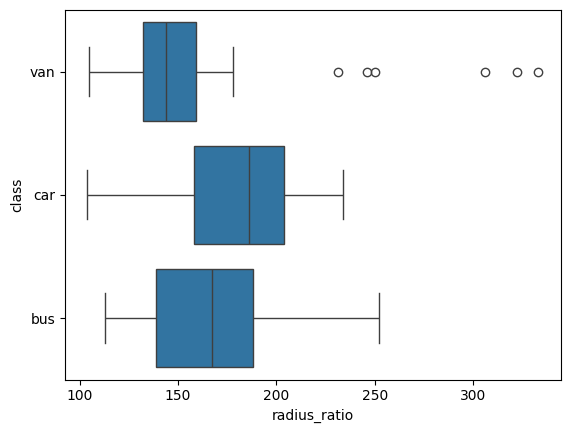

In [51]:
sns.boxplot(x="radius_ratio", y="class", data=df_vehicle);

- As we see, distributions are different for different classes
- Also, we see there are outliers for van. So it is suitable to replace missing values with median

In [52]:
df_vehicle.groupby(['class']).median()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,89.0,44.0,72.0,167.5,64.0,6.0,152.0,44.0,19.0,145.0,177.0,344.0,176.0,76.0,5.0,10.0,186.0,189.0
car,97.0,46.0,94.0,186.0,61.0,9.0,185.0,36.0,22.0,150.0,206.0,512.0,182.0,70.0,6.0,14.0,189.0,198.0
van,90.0,42.0,75.0,144.0,59.0,9.0,142.0,47.0,18.0,145.0,164.0,300.0,159.0,72.0,6.0,9.0,188.0,196.0


In [53]:
# Let's replace radius_ratio with median values by each of their classes
df_vehicle['radius_ratio'] = df_vehicle['radius_ratio'].fillna(df_vehicle.groupby('class')['radius_ratio'].transform('median'))

In [54]:
# Let's verify the imputated rows
idx = [9, 78, 159, 287, 345, 467]
df_vehicle.iloc[idx]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
9,93,44.0,98.0,186.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,167.5,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,186.0,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,144.0,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,167.5,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,186.0,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


In [55]:
df_vehicle[df_vehicle['skewness_about'].isnull()]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,NaN,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,NaN,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,NaN,5.0,195.0,201,car


- As we see, when there are missing values in skewness_about, mostly other values are not missing(On some occassions other columns are NaN but they are very few).
- It's useful to retain these rows for our model building and if we delete the rows, we lose information from other columns
- There is a categorical variable 'class' and it's worth to look at distribution of each by class

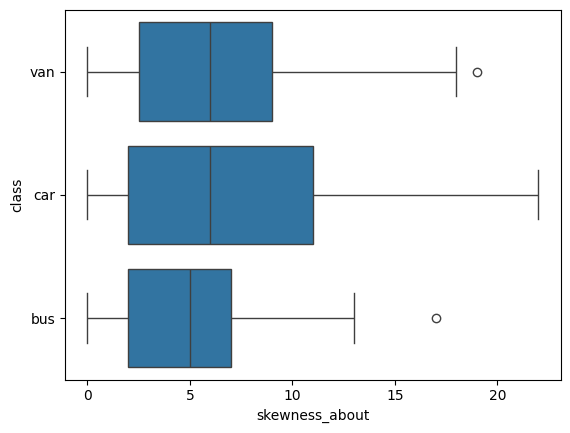

In [56]:
sns.boxplot(x="skewness_about", y="class", data=df_vehicle);

- As we see, distributions are slightly different for different classes
- Also, we see there are outliers for van and bus. So it is suitable to replace missing values with median

In [57]:
# Let's replace skewness_about with median values by each of their classes
df_vehicle['skewness_about'] = df_vehicle['skewness_about'].fillna(df_vehicle.groupby('class')['skewness_about'].transform('median'))

In [58]:
# Let's verify the imputated rows
idx = [66, 141, 177, 222, 249, 285]
df_vehicle.iloc[idx]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,5.0,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,5.0,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,5.0,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,5.0,1.0,197.0,198,bus
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,6.0,20.0,185.0,189,car
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,6.0,5.0,195.0,201,car


In [59]:
df_vehicle[df_vehicle['circularity'].isnull()]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


- As we see, when there are missing values in circularity, mostly other values are not missing(On some occassions other columns are NaN but they are very few).
- It's useful to retain these rows for our model building and if we delete the rows, we lose information from other columns
- There is a categorical variable 'class' and it's worth to look at distribution of each by class

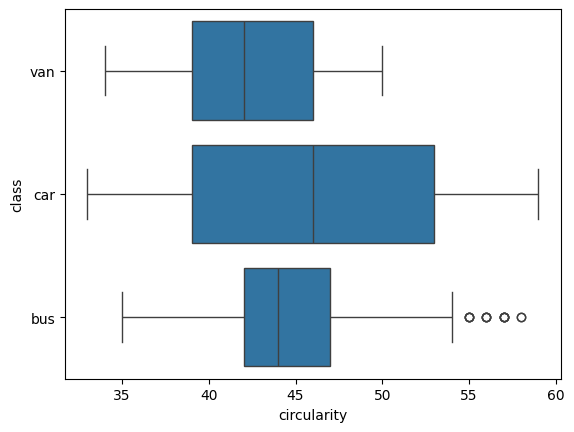

In [60]:
sns.boxplot(x="circularity", y="class", data=df_vehicle);

- As we see, distributions are slightly different for different classes
- Also, we see there are outliers for bus. So it is suitable to replace missing values with median

In [61]:
# Let's replace circularity with median values by each of their classes
df_vehicle['circularity'] = df_vehicle['circularity'].fillna(df_vehicle.groupby('class')['circularity'].transform('median'))

In [62]:
# Let's verify the imputated rows
idx = [5, 105, 118, 266, 396]
df_vehicle.iloc[idx]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,46.0,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,44.0,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


#### Since we see a trend for majority of the columns and let's impute missing values in other columns in a similar manner

In [63]:
# Let's replace missing values in other columns with median values by each of their classes

df_vehicle['distance_circularity'] = df_vehicle['distance_circularity'].fillna(df_vehicle.groupby('class')['distance_circularity'].transform('median'))
df_vehicle['scaled_radius_of_gyration.1'] = df_vehicle['scaled_radius_of_gyration.1'].fillna(df_vehicle.groupby('class')['scaled_radius_of_gyration.1'].transform('median'))
df_vehicle['pr.axis_rectangularity'] = df_vehicle['pr.axis_rectangularity'].fillna(df_vehicle.groupby('class')['pr.axis_rectangularity'].transform('median'))
df_vehicle['scaled_variance'] = df_vehicle['scaled_variance'].fillna(df_vehicle.groupby('class')['scaled_variance'].transform('median'))
df_vehicle['pr.axis_aspect_ratio'] = df_vehicle['pr.axis_aspect_ratio'].fillna(df_vehicle.groupby('class')['pr.axis_aspect_ratio'].transform('median'))
df_vehicle['scaled_variance.1'] = df_vehicle['scaled_variance.1'].fillna(df_vehicle.groupby('class')['scaled_variance.1'].transform('median'))
df_vehicle['scaled_radius_of_gyration'] = df_vehicle['scaled_radius_of_gyration'].fillna(df_vehicle.groupby('class')['scaled_radius_of_gyration'].transform('median'))
df_vehicle['skewness_about.2'] = df_vehicle['skewness_about.2'].fillna(df_vehicle.groupby('class')['skewness_about.2'].transform('median'))
df_vehicle['scatter_ratio'] = df_vehicle['scatter_ratio'].fillna(df_vehicle.groupby('class')['scatter_ratio'].transform('median'))
df_vehicle['elongatedness'] = df_vehicle['elongatedness'].fillna(df_vehicle.groupby('class')['elongatedness'].transform('median'))
df_vehicle['skewness_about.1'] = df_vehicle['skewness_about.1'].fillna(df_vehicle.groupby('class')['skewness_about.1'].transform('median'))


In [64]:
df_vehicle.isnull().mean().round(4).mul(100).sort_values(ascending=False)

compactness                    0.0
scaled_variance                0.0
hollows_ratio                  0.0
skewness_about.2               0.0
skewness_about.1               0.0
skewness_about                 0.0
scaled_radius_of_gyration.1    0.0
scaled_radius_of_gyration      0.0
scaled_variance.1              0.0
max.length_rectangularity      0.0
circularity                    0.0
pr.axis_rectangularity         0.0
elongatedness                  0.0
scatter_ratio                  0.0
max.length_aspect_ratio        0.0
pr.axis_aspect_ratio           0.0
radius_ratio                   0.0
distance_circularity           0.0
class                          0.0
dtype: float64

#### All missing values are imputed

#### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

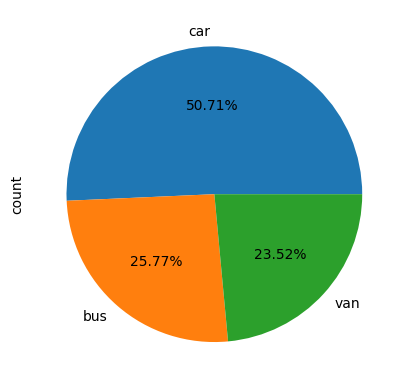

In [65]:
df_vehicle['class'].value_counts().plot(kind='pie', autopct='%1.2f%%');

- 50.71% of values belong to class 'Car'
- 25.77% of values belong to class 'Bus'
- 23.52% of values belong to class 'van'

#### D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [66]:
df_vehicle.duplicated().sum()

0

- There are no duplicated rows in the dataframe

#### 2. Data Preparation: [2 Marks]

#### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [67]:
#Splitting the data into X and Y
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df_vehicle.drop('class', axis=1)
y = df_vehicle["class"]
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1, stratify=y)

#### B. Standardize the Data. [1 Marks]

In [69]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [70]:
X_train_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-1.289667,-0.464583,-0.715924,-0.524581,0.276019,-0.346745,-0.602336,0.538915,-0.614617,-0.409926,-0.537681,-0.617965,-0.515031,0.211874,-0.898710,-1.202367,-0.817364,-0.779259
1,-0.319367,-1.443466,-0.651848,-0.221334,-0.234135,-0.136710,-0.571838,0.407963,-0.614617,-1.031249,-0.731464,-0.600763,-1.663874,-1.241537,-0.898710,1.052279,1.154812,1.257783
2,0.772222,0.188005,1.398578,0.445809,-0.234135,0.073326,0.861569,-0.901549,0.947342,-0.064747,1.077177,0.798351,0.726960,0.079746,1.326667,0.037689,0.004376,0.171361
3,-0.561942,0.351153,-0.139242,-1.161399,-0.999368,0.493397,-0.266858,0.277012,-0.224127,1.039828,-0.440789,-0.400070,-0.018235,0.608259,-1.101017,-0.638705,-1.146060,-0.371851
4,1.136084,1.166888,1.334502,0.021263,-1.254445,-0.346745,2.050992,-1.687256,2.118812,0.832720,2.110686,2.163060,2.341549,1.268901,-0.696403,1.165012,-0.981712,-1.594076


In [71]:
X_test_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.287071,-0.954025,-0.331469,-0.281984,0.020942,-0.136710,-0.876818,0.800817,-1.005107,0.142361,-0.892950,-0.830126,-1.570724,-1.373665,1.731282,-1.089634,1.976552,1.665192
1,-0.076792,-0.790878,-0.587772,-0.918802,-0.489213,-0.556781,-0.998810,1.062719,-1.005107,-0.686070,-0.731464,-0.939073,-1.167077,0.079746,-1.303324,-1.427831,-0.324320,-1.050865
2,-0.319367,-1.117172,-0.459621,-1.009776,-1.126906,-0.556781,-0.754826,0.800817,-0.614617,-1.169321,-0.763761,-0.767051,-0.794480,-0.448767,-1.101017,-0.638705,-0.488668,-0.643456
3,-0.683229,-0.790878,-1.741137,-1.676919,-1.126906,-0.346745,-1.120802,1.586524,-1.005107,-0.617034,-1.506596,-1.088159,-0.515031,1.929542,-1.303324,-0.638705,-2.132148,-1.729879
4,-1.047092,-0.790878,-0.651848,-0.918802,-0.361674,-0.766816,-1.120802,1.193671,-1.005107,-0.893177,-0.957544,-1.025084,-0.763430,-0.580895,-0.696403,-0.413241,0.333072,-0.100245


#### 3. Model Building: [13 Marks]

#### A. Train a base Classification model using SVM. [1 Marks]

In [72]:
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

SVC()

#### B. Print Classification metrics for train data. [1 Marks]

##### Classification metrics for the train data

In [73]:
y_pred_clf_train = clf.predict(X_train_scaled)

In [74]:
print(classification_report(y_train,  y_pred_clf_train))

              precision    recall  f1-score   support

         bus       0.99      0.99      0.99       174
         car       0.99      0.98      0.98       343
         van       0.96      0.97      0.96       159

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



##### Classification metrics for the test data

In [75]:
y_pred_clf_test = clf.predict(X_test_scaled)

In [76]:
print(classification_report(y_test,  y_pred_clf_test))

              precision    recall  f1-score   support

         bus       0.98      0.95      0.97        44
         car       0.98      0.94      0.96        86
         van       0.84      0.93      0.88        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



#### C. Apply PCA on the data with 10 components. [3 Marks]

In [77]:
pca10 = PCA(n_components=10)
pca10.fit(X_train_scaled)

PCA(n_components=10)

##### Here are the Eigen Values of the PCA

In [78]:
print(pca10.explained_variance_)

[9.39493327 2.96827769 1.94034432 1.19073603 0.92894919 0.55536497
 0.3608512  0.22308058 0.15448487 0.09247215]


##### Here are the Eigen Vectors of the PCA

In [79]:
print(pca10.components_)

[[ 2.75795084e-01  2.94128104e-01  3.03211304e-01  2.69915026e-01
   7.95302290e-02  9.32065107e-02  3.17274244e-01 -3.13879182e-01
   3.14224052e-01  2.82314769e-01  3.08668971e-01  3.14418669e-01
   2.71332193e-01 -2.48994061e-02  4.19580243e-02  4.89184647e-02
   3.40767549e-02  7.94294860e-02]
 [-1.33377627e-01  1.27141885e-01 -7.84261117e-02 -1.75214509e-01
  -9.21086507e-02  3.39707287e-02  4.64581190e-02  1.64888921e-02
   5.83358129e-02  1.18476548e-01  6.98061650e-02  5.20275514e-02
   2.11048533e-01  4.91030328e-01 -6.53469201e-02 -1.09890151e-01
  -5.45543200e-01 -5.40824440e-01]
 [-9.86386421e-02 -3.52045071e-02 -5.90216512e-02  2.78216529e-01
   6.43742539e-01  5.84897535e-01 -9.98155906e-02  5.85799600e-02
  -1.13370645e-01 -3.18190501e-02  7.07530540e-02 -1.09309063e-01
  -3.70378111e-02  2.92815599e-01 -7.92433472e-02 -8.69846167e-02
   4.78802810e-02  6.45582870e-02]
 [-8.15680323e-02 -1.89263436e-01  8.03354948e-02  4.53041660e-02
  -2.37430716e-02  1.21724872e-02  9.

#### D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

##### Print the explained cumulative variance ratio with each of the components, first component being the highest explainability. 

In [80]:
print(pca10.explained_variance_ratio_ * 100)

[52.11686354 16.46603747 10.76374438  6.60541436  5.15319446  3.0807968
  2.00176329  1.23750322  0.85697968  0.51297421]


##### Plot the cumulative variance ratio in the bar chart

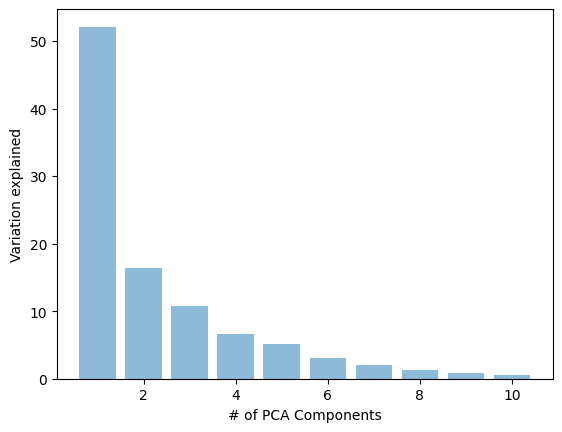

In [81]:
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_ * 100 ,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()

##### Plot a cumulative variance ratio in step chart

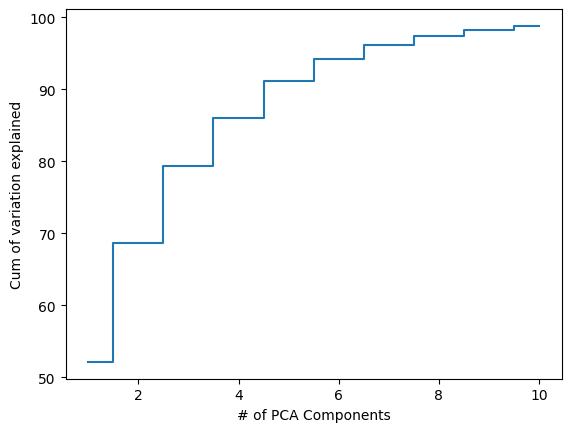

In [82]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_ * 100), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

#### E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

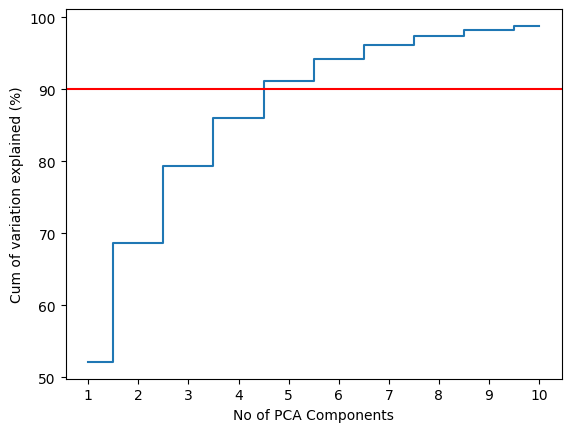

In [83]:
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_ * 100), where='mid')
plt.ylabel('Cum of variation explained (%)')
plt.xlabel('No of PCA Components')
plt.axhline(y=90, color='red')
plt.xticks(np.arange(1, 11, step=1))
plt.show()

#### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [84]:
pca5 = PCA(n_components=5)
pca5.fit(X_train_scaled)

PCA(n_components=5)

#### G. Train SVM model on components selected from above step. [1 Marks]

In [85]:
X_train_pca5 = pca5.transform(X_train_scaled)
X_test_pca5 = pca5.transform(X_test_scaled)
clf_pca = svm.SVC()
clf_pca.fit(X_train_pca5, y_train)

SVC()

#### H. Print Classification metrics for train data of above model and share insights. [2 Marks]

##### Classification metrics for the train data

In [86]:
y_pred_clf_pca_train = clf_pca.predict(X_train_pca5)

In [87]:
print(classification_report(y_train,  y_pred_clf_pca_train))

              precision    recall  f1-score   support

         bus       0.88      0.71      0.79       174
         car       0.85      0.91      0.88       343
         van       0.70      0.75      0.72       159

    accuracy                           0.82       676
   macro avg       0.81      0.79      0.80       676
weighted avg       0.82      0.82      0.82       676



##### Classification metrics for the test data

In [88]:
y_pred_clf_pca_test = clf_pca.predict(X_test_pca5)

In [89]:
print(classification_report(y_test,  y_pred_clf_pca_test))

              precision    recall  f1-score   support

         bus       0.88      0.68      0.77        44
         car       0.80      0.81      0.80        86
         van       0.62      0.75      0.68        40

    accuracy                           0.76       170
   macro avg       0.77      0.75      0.75       170
weighted avg       0.78      0.76      0.77       170



#### Insights:

##### After applying PCA and reducing dimension of the data to 5 features:

- Observations on Training Data:
    - Overall accuracy reduced from 98% to 82%
    - Weighted avarage precision reduced from 98% to 82%
    - Weighted average recall reduced from 98% to 82%
    - Weighted average f1-score reduced from 98% to 82%

- Observations on Testing Data:  
    - Overall accuracy reduced from 94% to 76%
    - Weighted avarage precision reduced from 94% to 78%
    - Weighted average recall reduced from 94% to 76%
    - Weighted average f1-score reduced from 94% to 77%

#### 4. Performance Improvement: [5 Marks]

#### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [90]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(clf_pca, param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train_pca5, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

#### B. Share best Parameters observed from above step. [1 Marks]

In [91]:
# print best parameter after tuning 
print("The best parameters are: ", grid.best_params_)

The best parameters are:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [92]:
clf_pca_tuned = svm.SVC(C=10, gamma=0.1, kernel='rbf')
clf_pca_tuned.fit(X_train_pca5, y_train)

SVC(C=10, gamma=0.1)

#### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

##### Classification metrics for the train data

In [93]:
y_pred_clf_pca_tuned_train = clf_pca_tuned.predict(X_train_pca5)

In [94]:
print(classification_report(y_train,  y_pred_clf_pca_tuned_train))

              precision    recall  f1-score   support

         bus       0.90      0.88      0.89       174
         car       0.94      0.93      0.93       343
         van       0.85      0.87      0.86       159

    accuracy                           0.91       676
   macro avg       0.89      0.90      0.89       676
weighted avg       0.91      0.91      0.91       676



##### Classification metrics for the test data

In [95]:
y_pred_clf_pca_tuned_test = clf_pca_tuned.predict(X_test_pca5)

In [96]:
print(classification_report(y_test,  y_pred_clf_pca_tuned_test))

              precision    recall  f1-score   support

         bus       0.88      0.82      0.85        44
         car       0.86      0.84      0.85        86
         van       0.69      0.78      0.73        40

    accuracy                           0.82       170
   macro avg       0.81      0.81      0.81       170
weighted avg       0.82      0.82      0.82       170



#### Insights:

##### After applying grid search and tuning the hyper-parameters of SVM for the data with 5 PCA components:

- Observations on Training Data:
    - Overall accuracy increased from 82% to 91%
    - Weighted avarage precision increased from 82% to 91%
    - Weighted average recall increased from 82% to 91%
    - Weighted average f1-score increased from 82% to 91%

- Observations on Testing Data:  
    - Overall accuracy increased from 76% to 82%
    - Weighted avarage precision increased from 78% to 82% 
    - Weighted average recall increased from 76% to 82%
    - Weighted average f1-score increased from 77% to 82%

#### 5. Data Understanding & Cleaning: [5 Marks]

#### A. Explain pre-requisite/assumptions of PCA. [2 Marks]

##### Principal Component Analysis or PCA is dimensionality reduction technique used to pre-process the data before applying a machine learning algorithm.

##### Few of the pre-requisites of PCA are:
- Since PCA is sensitive to the scale of the features, it is necessary to standardize/scale the data before applying PCA
- It is also important to impute or delete the missing values from the dataset before applying PCA
- PCA is not robust against outliers, it is recommended to remove outliers from the data before performing PCA

##### Few of the assumptions of PCA are:
- PCA assumes there is some correlation between the features. If there is no correlation between the features, PCA won't be able to efficiently determine principal components
- PCA is based on linear algebra. PCA assumes there is some linear relationship between the features. The algorithm is not well suited to capturing non-linear relationships. That’s why it’s advised to turn non-linear features or relationships between features into linear, using the standard methods such as log transforms.

#### B. Explain advantages and limitations of PCA. [3 Marks]

##### Advantages of PCA

- PCA is computationally easy to compute since it is based on linear algebra.
- Since the number of features are reduced from doing PCA compared to original data, Machine learning algorithms converge faster when trained on principal components instead of the original dataset.
- High-dimensional data causes regression-based algorithms to overfit easily. By using PCA beforehand to lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting.

##### Limitations of PCA

- Loss of explainability of features:
  - Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components.

- Loss of information loss by reducing the dimensinality:
  - Although dimensionality reduction is useful, it comes at a cost. Information loss is a necessary part of PCA. Balancing the trade-off between dimensionality reduction and information loss is unfortunately a necessary compromise that we have to make when using PCA. By dropping the components which contribute less to the dependent variable, we lose some information which could make the model more accurate. In the above example, we saw accuracy of the SVM on the original test dataset was 94% without any tuning, but the same after applying PCA, came down to 76%. However, with hyper-parameter tuning, we could increase the accuracy to 82% but it is not close to 94% which we got on the original dataset.
 
##### Overall, PCA helps in dimensionality reduction when there are very high number of features which takes significant time to compute. But, we lose the explainability of features and also accuracy of the model by using this technique. Nowadays, there is abundant availabilty of computation power, which can handle most complex datasets. PCA need to be carefully used only when it is necessary.